In [24]:
import pandas as pd
import random
a = pd.read_csv("memfootp.tsv", sep='\t')

Text(0.5, 0, 'Input Size (MB)')

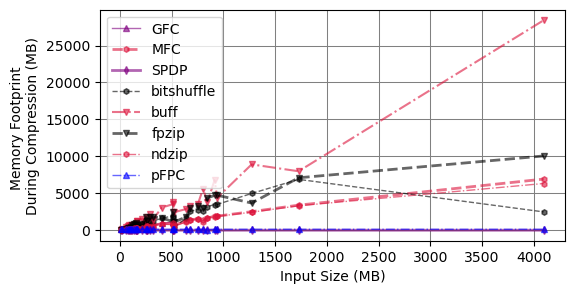

In [55]:
import matplotlib.pyplot as plt
import numpy as np

cors = ["GFC", "MFC", "SPDP", "bitshuffle", "buff", "fpzip", "ndzip", "pFPC", ]
fields = ["bytes", "comp kbytes"]

colors = ["black", "crimson", "purple", "blue", "red"]
line_styles = ["--", "-", "-."]
weights = [1, 1.5, 2]
markers = ["d", "h", "v", "^", "o"]

fig, ax = plt.subplots(figsize=(6, 3))

for cor in cors:
    ori_bytes = a[cor + " " + "bytes"] 
    comp_bytes = a[cor + " " + "comp kbytes"] * 1024
    sorted_bytes = sorted(zip(ori_bytes, comp_bytes), key=lambda x: x[0])
    # print(sorted_bytes)
    ori, comp = zip(*sorted_bytes)
    ax.plot(np.array(ori)/(1024.0**2), np.array(comp)/(1024.0**2), alpha=0.6, label=cor, ls=random.choice(line_styles), color=random.choice(colors), lw=random.choice(weights), marker=random.choice(markers), markersize=4)
    # print(ori)
ax.legend()
ax.grid(color='gray', lw=.75)
ax.set_ylabel("Memory Footprint \nDuring Compression (MB)")
ax.set_xlabel("Input Size (MB)")


In [47]:
fig.tight_layout()
fig.savefig("fcbench_memfootp.pdf")

In [48]:
!open .